In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
import warnings
warnings.filterwarnings('ignore')

In [10]:
import sys
sys.path.append("../scripts/")
from data_cleaner import DataCleaner
from util import Util

In [11]:
util = Util()
cleaner = DataCleaner()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\amdea\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amdea\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\amdea\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [14]:
repo="https://github.com/Amdework21/LLMs-Prompt-Engineering.git"
news_df=util.read_from_dvc("data/Example_data.csv",repo,"HEAD",low_memory=False)

# news_df=util.read_from_file('../data/news.csv')

In [15]:
print(news_df.shape)
news_df.head()

(10, 9)


,Domain,Title,Description,Body,Link,timestamp,Analyst_Average_Score,Analyst_Rank,Reference_Final_Score
0,rassegnastampa.news,Boris Johnson using a taxpayer-funded jet for ...,…often trigger a protest vote that can upset…t...,Boris Johnson using a taxpayer-funded jet for ...,https://rassegnastampa.news/boris-johnson-usin...,2021-09-09T18:17:46.258006,0.0,4,1.96
1,twitter.com,"Stumbled across an interesting case, a woman f...","Stumbled across an interesting case, a woman f...","Stumbled across an interesting case, a woman f...",http://twitter.com/CoruscaKhaya/status/1435585...,2021-09-08T13:02:45.802298,0.0,4,12.00
2,atpe-tchad.info,Marché Résines dans les peintures et revêtemen...,…COVID-19…COVID…COVID…COVID-19 et Post COVID…C...,Le rapport d’étude de marché Résines dans les ...,http://atpe-tchad.info/2021/09/13/marche-resin...,2021-09-13T07:32:46.244403,0.0,4,0.05
3,badbluetech.bitnamiapp.com,"AI drives data analytics surge, study finds",…hate raiders' linked to automated harassment ...,How to drive the funnel through content market...,http://badbluetech.bitnamiapp.com/p.php?sid=21...,2021-09-11T00:17:45.962605,0.0,4,6.10
4,kryptogazette.com,Triacetin Vertrieb Markt 2021: Globale Unterne...,…Abschnitten und Endanwendungen / Organisation...,Global Triacetin Vertrieb-Markt 2021 von Herst...,https://kryptogazette.com/2021/09/08/triacetin...,2021-09-08T12:47:46.078369,0.0,4,0.13


In [16]:
news_df.columns

Index(['Domain', 'Title', 'Description', 'Body', 'Link', 'timestamp',
       'Analyst_Average_Score', 'Analyst_Rank', 'Reference_Final_Score'],
      dtype='object')

In [17]:
news_df.describe()

,Analyst_Average_Score,Analyst_Rank,Reference_Final_Score
count,10.000000,10.000000,10.000000
mean,0.332000,3.400000,4.532000
std,0.626379,1.074968,4.834468
min,0.000000,1.000000,0.050000
25%,0.000000,3.250000,0.505000
50%,0.000000,4.000000,2.180000
75%,0.247500,4.000000,9.100000
max,1.660000,4.000000,12.000000


we have three numerical columns here, according to the given task, we are required to give score in the range of 0 - 10 so we will use analyst_average score for training 

In [18]:
# make a little rearrange of columns

temp = news_df['Analyst_Average_Score']
news_df.drop('Analyst_Average_Score',axis=1,inplace=True)
news_df['Analyst_Average_Score']=temp
news_df.head()

,Domain,Title,Description,Body,Link,timestamp,Analyst_Rank,Reference_Final_Score,Analyst_Average_Score
0,rassegnastampa.news,Boris Johnson using a taxpayer-funded jet for ...,…often trigger a protest vote that can upset…t...,Boris Johnson using a taxpayer-funded jet for ...,https://rassegnastampa.news/boris-johnson-usin...,2021-09-09T18:17:46.258006,4,1.96,0.0
1,twitter.com,"Stumbled across an interesting case, a woman f...","Stumbled across an interesting case, a woman f...","Stumbled across an interesting case, a woman f...",http://twitter.com/CoruscaKhaya/status/1435585...,2021-09-08T13:02:45.802298,4,12.00,0.0
2,atpe-tchad.info,Marché Résines dans les peintures et revêtemen...,…COVID-19…COVID…COVID…COVID-19 et Post COVID…C...,Le rapport d’étude de marché Résines dans les ...,http://atpe-tchad.info/2021/09/13/marche-resin...,2021-09-13T07:32:46.244403,4,0.05,0.0
3,badbluetech.bitnamiapp.com,"AI drives data analytics surge, study finds",…hate raiders' linked to automated harassment ...,How to drive the funnel through content market...,http://badbluetech.bitnamiapp.com/p.php?sid=21...,2021-09-11T00:17:45.962605,4,6.10,0.0
4,kryptogazette.com,Triacetin Vertrieb Markt 2021: Globale Unterne...,…Abschnitten und Endanwendungen / Organisation...,Global Triacetin Vertrieb-Markt 2021 von Herst...,https://kryptogazette.com/2021/09/08/triacetin...,2021-09-08T12:47:46.078369,4,0.13,0.0


<AxesSubplot:>

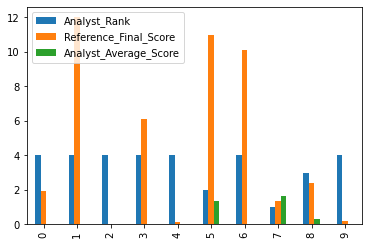

In [19]:
news_df.plot(kind='bar')

In [20]:
cleaned_df=cleaner.clean_links(news_df,['Body'])
cleaned_df=cleaner.clean_symbols(cleaned_df,['Body','Description','Title'])
cleaned_df=cleaner.convert_to_datetime(cleaned_df,['timestamp'])
cleaned_df.head(5)

,Domain,Title,Description,Body,Link,timestamp,Analyst_Rank,Reference_Final_Score,Analyst_Average_Score
0,rassegnastampa.news,Boris Johnson using a taxpayer funded jet for ...,often trigger a protest vote that can upset t...,Boris Johnson using a taxpayer funded jet for ...,https://rassegnastampa.news/boris-johnson-usin...,2021-09-09 18:17:46.258006,4,1.96,0.0
1,twitter.com,Stumbled across an interesting case a woman f...,Stumbled across an interesting case a woman f...,Stumbled across an interesting case a woman f...,http://twitter.com/CoruscaKhaya/status/1435585...,2021-09-08 13:02:45.802298,4,12.00,0.0
2,atpe-tchad.info,Marché Résines dans les peintures et revêtemen...,COVID 19 COVID COVID COVID 19 et Post COVID C...,Le rapport d étude de marché Résines dans les ...,http://atpe-tchad.info/2021/09/13/marche-resin...,2021-09-13 07:32:46.244403,4,0.05,0.0
3,badbluetech.bitnamiapp.com,AI drives data analytics surge study finds,hate raiders linked to automated harassment ...,How to drive the funnel through content market...,http://badbluetech.bitnamiapp.com/p.php?sid=21...,2021-09-11 00:17:45.962605,4,6.10,0.0
4,kryptogazette.com,Triacetin Vertrieb Markt 2021 Globale Unterne...,Abschnitten und Endanwendungen Organisation...,Global Triacetin Vertrieb Markt 2021 von Herst...,https://kryptogazette.com/2021/09/08/triacetin...,2021-09-08 12:47:46.078369,4,0.13,0.0


In [13]:
# uncomment this for first run only
# cleaned_df.to_csv('../data/news.csv',index=False)